In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
mouse_trial_df = pd.DataFrame.merge(mouse_df, trial_df, on = "Mouse ID")


# Display the data table for preview

mouse_trial_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
# Convert to DataFrame
DrugTumorData = mouse_trial_df[["Drug", "Timepoint", "Tumor Volume (mm3)"]]

DrugTimeMeanTumor_df = DrugTumorData.groupby(["Drug", "Timepoint"], as_index = False)["Tumor Volume (mm3)"].mean().rename(columns={"Tumor Volume (mm3)" : "Mean Tumor Volume (mm3)"})


# Preview DataFrame

DrugTimeMeanTumor_df.head()

,Drug,Timepoint,Mean Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [11]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame

DrugTimeSteTumor_df = DrugTumorData.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem().reset_index().rename(columns={"Tumor Volume (mm3)": "Standard Error Tumor Volume"})

# Preview DataFrame

DrugTimeSteTumor_df.head()

,Drug,Timepoint,Standard Error Tumor Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [119]:
# Minor Data Munging to Re-Format the Data Frames

DrugTimeMeanTumor_df2 = DrugTimeMeanTumor_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mean Tumor Volume (mm3)')

# Preview that Reformatting worked
DrugTimeMeanTumor_df2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


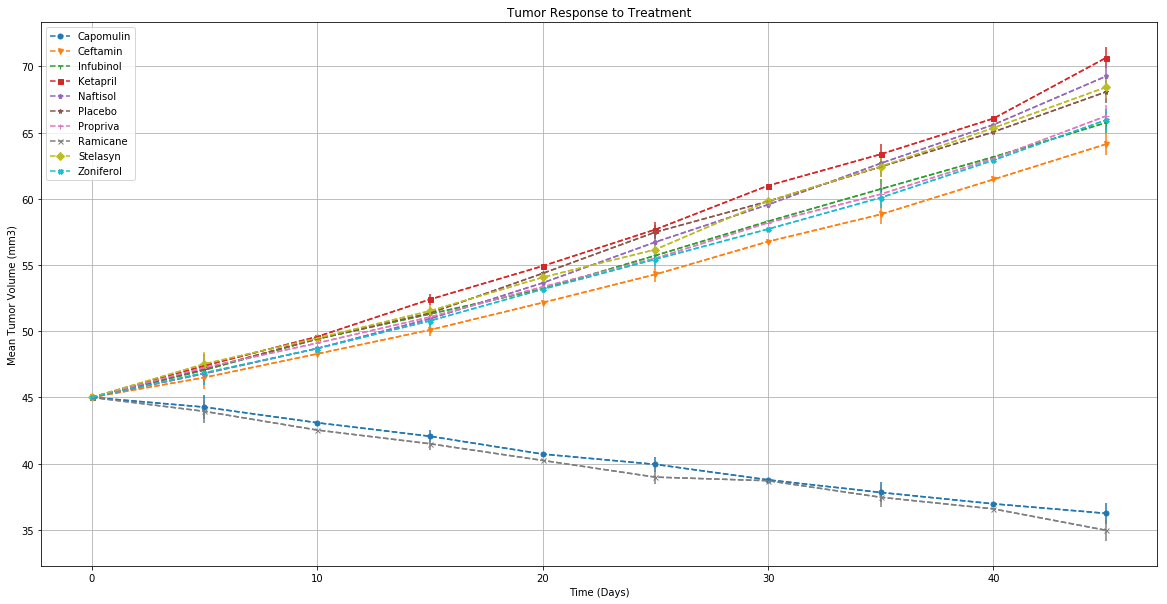

In [250]:
# Generate the Plot (with Error Bars)
error = DrugTimeSteTumor_df["Standard Error Tumor Volume"]
legend = list(DrugTimeSteTumor_df["Drug"].unique())
styleList = ["o-", "v-", "1-", "s-", "p-", "*-", "+-", "x-", "D-", "X-"]

##plot error bars
ax = DrugTimeMeanTumor_df2.plot(figsize=(20,10), yerr = error, linestyle = '--', legend = False)

## reset color cycle to make marker colors match
ax.set_prop_cycle(None)

##plot markers
Tum_resp_fig = DrugTimeMeanTumor_df2.plot(linestyle = '--', figsize=(20,10), style = styleList, markersize = 5, grid = True, ax=ax)

##Figure formatting
plt.xlabel("Time (Days)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.legend(labels = legend)

# Save the Figure
plt.savefig("Tumor_Response_To_Treatment.jpeg")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [9]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [10]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [12]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [13]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [15]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined